<div style="text-align: left;"><img src="https://www.juliabox.org/assets/img/juliacloudlogo.png" style="margin: 0px 0px 0px 0px; padding-right: 20px;width: 80px; float: left;" title="" alt="" /></div>
<img src="http://dmkpress.com/images/cms/thumbs/a5b0aeaa3fa7d6e58d75710c18673bd7ec6d5f6d/978-5-97060-370-3_270_369__100.jpg" style="margin: 0px 0px 5px 20px; width: 100px; float: right;" title="" alt="" />
Всестороннее введение в новый язык программирования для научно-технических вычислений [Julia](http://julialang.org/) в книге Малколма Шеррингтона, Packt Publishing, июль 2015.

<h1>Осваиваем язык Julia</h1><br />

Совершенствование мастерства в области аналитики и программирования при помощи Julia в целях решения задач комплексной обработки данных
<div style="text-align: left;font-size:8pt;padding-top:10px;">Программный код Julia (v0.4.5) протестирован в Windows 8.1/10 и Linux/Lubuntu 16.4</div>
<div style="text-align: left;"><h1>Глава 6. Примеры</h1></div>

### Экзотермическая реакция, вар.1

In [4]:
function exotherm1(t, x, dx; n=1, a=1, b=1) # экзотермическая реакция
  p = x[2]^n * exp(x[1])
  dx[1] = p - a*x[1]
  dx[2] = -b*p
  dx
end

exotherm1 (generic function with 1 method)

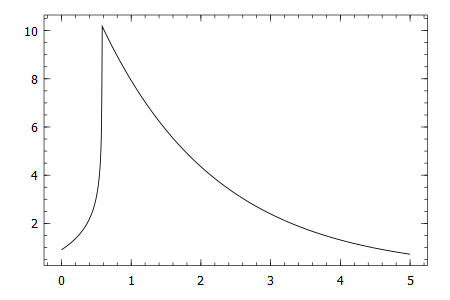

In [3]:
using Sundials

t = linspace(0.0,5.0,1001);
fexo(t,x,dx) = exotherm1(t, x, dx, a=0.6, b=0.1);

x1 = Sundials.cvode(fexo, [0.9, 1.0], convert(Array, t));

using Winston

plot(t,x1[:,1])

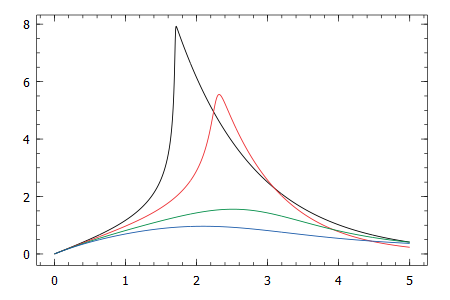

In [5]:
using Sundials

t = linspace(0.0,5.0,1001);
arr = [0.9, 1.2, 1.5, 1.8]
res = Any[]

for el in arr
  fexo(t,x,dx) = exotherm1(t, x, dx, a=el, b=0.1);
  push!(res, Sundials.cvode(fexo, [0.0, 1.0], convert(Array, t)));   
end

using Winston

plot(t,res[1][:,1],t,res[2][:,1],t,res[3][:,1],t,res[4][:,1])